<a href="https://colab.research.google.com/github/OlekanmaVictoria/Artificial-intelligence-Data-science-Portfolio/blob/main/Segmentation_and_Analysis_of_CK8_18_and_Ki67_Markers_for_Cancer_Morphology_Evaluation20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Install Required Libraries**

In [ ]:
!pip install cellpose opencv-python-headless scikit-image numpy matplotlib python-pptx


Step 2: Ensure GPU is Enabled
Before running the segmentation, make sure that your runtime is set to use the GPU:

Go to Runtime > Change runtime type.
Set Hardware accelerator to GPU.
Save the settings.

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


Step 3: Unzip the Image Files
Unzip the provided images for processing: **bold text**

In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_file_path = '/content/Cancer Morphology Evaluation Images.zip'
extraction_path = '/content/extracted_images/'  # Path where images will be extracted

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files to confirm
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)


Extracted files: ['CK-_Ki-_JC400 vs LOHP_CNT_N2 CK818.png', 'CK-_Ki-_JC400 vs LOHP_Treat_ N1 CK818.png', 'CK+_Ki+_JC069 vs LOHP_Treat_N3 CK818.png', 'CK+_Ki+_JC069 vs LOHP_Treat_N2 CK818.png', 'CK+_Ki+_JC069 vs LOHP_Treat_ N1 Ki67.png', 'CK-_Ki+_JC011 vs 5FU_Treat_N2 CK818.png', 'CK-_Ki-_JC400 vs LOHP_CNT_ N1 CK818.png', 'CK+_Ki+_JC069 vs LOHP_Treat_ N1 CK818.png', 'CK-_Ki-_JC400 vs LOHP_CNT_N3 CK818.png', 'CK+_Ki+_JC069 vs LOHP_Treat_N2 Ki67.png', 'CK-_Ki+_JC011 vs 5FU_Treat_N3 Ki67.png', 'CK-_Ki+_JC011 vs 5FU_CNT_N2 Ki67.png', 'CK-_Ki-_JC400 vs LOHP_Treat_N3 CK818.png', 'CK-_Ki-_JC400 vs LOHP_Treat_ N1 Ki67.png', 'CK-_Ki-_JC400 vs LOHP_Treat_N3 Ki67.png', 'CK-_Ki-_JC400 vs LOHP_CNT_N2 Ki67.png', 'CK+_Ki+_JC069 vs LOHP_CNT_N3 Ki67.png', 'CK-_Ki+_JC011 vs 5FU_CNT_N3 CK818.png', 'CK-_Ki-_JC400 vs LOHP_Treat_N2 Ki67.png', 'CK-_Ki-_JC400 vs LOHP_CNT_N3 Ki67.png', 'segmented_images', 'CK+_Ki+_JC069 vs LOHP_CNT_ N1 CK818.png', 'CK-_Ki+_JC011 vs 5FU_CNT_ N1 Ki67.png', 'CK+_Ki+_JC069 vs LOHP_

Step 4: Segment Images Using Cellpose with GPU
We will now use Cellpose to segment the images, explicitly enabling GPU usage

Processed 1/38: CK-_Ki-_JC400 vs LOHP_CNT_N2 CK818.png


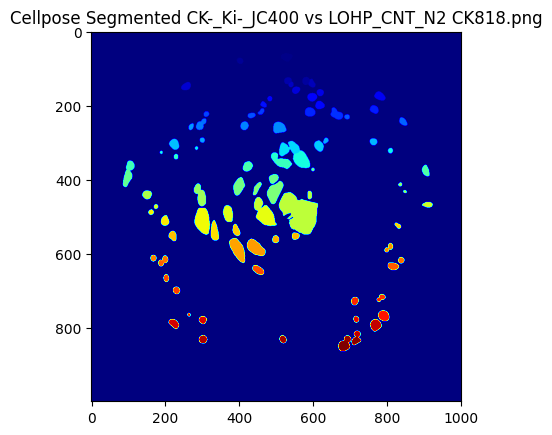

Processed 2/38: CK-_Ki-_JC400 vs LOHP_Treat_ N1 CK818.png


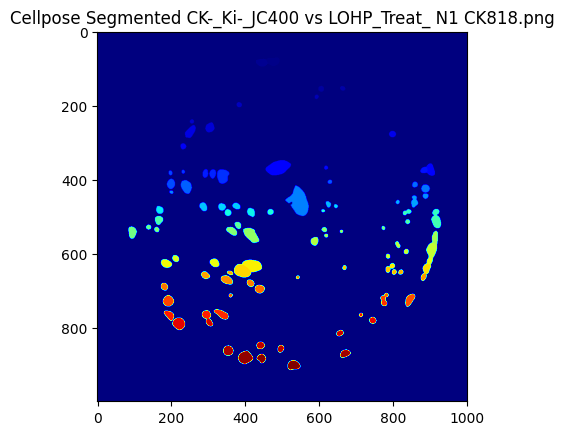

Processed 3/38: CK+_Ki+_JC069 vs LOHP_Treat_N3 CK818.png


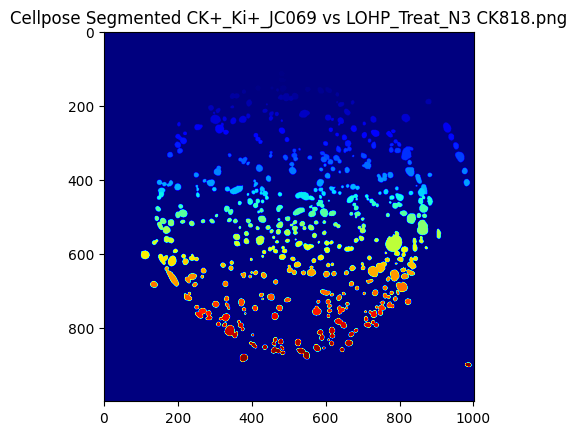

Processed 4/38: CK+_Ki+_JC069 vs LOHP_Treat_N2 CK818.png
Processed 5/38: CK+_Ki+_JC069 vs LOHP_Treat_ N1 Ki67.png
Processed 6/38: CK-_Ki+_JC011 vs 5FU_Treat_N2 CK818.png
Processed 7/38: CK-_Ki-_JC400 vs LOHP_CNT_ N1 CK818.png
Processed 8/38: CK+_Ki+_JC069 vs LOHP_Treat_ N1 CK818.png
Processed 9/38: CK-_Ki-_JC400 vs LOHP_CNT_N3 CK818.png
Processed 10/38: CK+_Ki+_JC069 vs LOHP_Treat_N2 Ki67.png
Processed 11/38: CK-_Ki+_JC011 vs 5FU_Treat_N3 Ki67.png
Processed 12/38: CK-_Ki+_JC011 vs 5FU_CNT_N2 Ki67.png
Processed 13/38: CK-_Ki-_JC400 vs LOHP_Treat_N3 CK818.png
Processed 14/38: CK-_Ki-_JC400 vs LOHP_Treat_ N1 Ki67.png
Processed 15/38: CK-_Ki-_JC400 vs LOHP_Treat_N3 Ki67.png
Processed 16/38: CK-_Ki-_JC400 vs LOHP_CNT_N2 Ki67.png
Processed 17/38: CK+_Ki+_JC069 vs LOHP_CNT_N3 Ki67.png
Processed 18/38: CK-_Ki+_JC011 vs 5FU_CNT_N3 CK818.png
Processed 19/38: CK-_Ki-_JC400 vs LOHP_Treat_N2 Ki67.png
Processed 20/38: CK-_Ki-_JC400 vs LOHP_CNT_N3 Ki67.png
Processed 22/38: CK+_Ki+_JC069 vs LOHP_CNT_ 

In [ ]:
from cellpose import models, io
import matplotlib.pyplot as plt
import os

# Load the Cellpose model with GPU enabled
model = models.Cellpose(gpu=True, model_type='cyto')

# Directory to save the segmented images
segmented_images_dir = os.path.join(extraction_path, 'segmented_images/')
os.makedirs(segmented_images_dir, exist_ok=True)

# Function to segment images using Cellpose
def segment_with_cellpose(image_path, output_dir):
    # Load the image
    image = io.imread(image_path)

    # Perform segmentation using GPU
    masks, flows, styles, diams = model.eval(image, diameter=None, channels=[0,0])

    # Save the segmented image
    output_path = os.path.join(output_dir, f"cellpose_segmented_{os.path.basename(image_path)}")
    io.imsave(output_path, masks)

    return masks, output_path

# Segment all images
image_files = os.listdir(extraction_path)
for i, image_file in enumerate(image_files):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(extraction_path, image_file)
        masks, output_path = segment_with_cellpose(image_path, segmented_images_dir)

        # Display progress and the first few segmented images as a preview
        print(f"Processed {i + 1}/{len(image_files)}: {image_file}")
        if i < 3:  # Display the first 3 images
            plt.imshow(masks, cmap='jet')
            plt.title(f"Cellpose Segmented {image_file}")
            plt.show()


Step 5: Extract Morphological Measurements
Once the images are segmented, we extract relevant measurements. **bold text**

In [ ]:
from skimage import measure
import pandas as pd

# Function to extract morphological measurements
def extract_measurements(segmented_image_path):
    # Read the segmented image
    segmented_image = io.imread(segmented_image_path)

    # Label the regions in the segmented image
    labeled_image = measure.label(segmented_image)

    # Extract region properties
    properties = measure.regionprops_table(labeled_image, properties=('label', 'area', 'perimeter', 'eccentricity', 'solidity'))

    # Convert to a DataFrame for easy handling
    df = pd.DataFrame(properties)
    df['image'] = os.path.basename(segmented_image_path)

    return df

# Extract measurements from all segmented images and compile them into a single DataFrame
measurements_list = []
segmented_image_files = os.listdir(segmented_images_dir)
for segmented_image_file in segmented_image_files:
    segmented_image_path = os.path.join(segmented_images_dir, segmented_image_file)
    df = extract_measurements(segmented_image_path)
    measurements_list.append(df)

# Combine all measurements into a single DataFrame
measurements_df = pd.concat(measurements_list, ignore_index=True)

# Save the measurements to a CSV file
measurements_csv_path = os.path.join(segmented_images_dir, 'segmented_images_measurements.csv')
measurements_df.to_csv(measurements_csv_path, index=False)

# Display the first few rows of the measurements data
measurements_df.head()


,label,area,perimeter,eccentricity,solidity,image
0,1,1639.0,252.433550,0.985117,0.835798,cellpose_segmented_CK-_Ki-_JC400 vs LOHP_Treat...
1,2,560.0,129.331998,0.975752,0.884676,cellpose_segmented_CK-_Ki-_JC400 vs LOHP_Treat...
2,3,422.0,75.355339,0.347257,0.963470,cellpose_segmented_CK-_Ki-_JC400 vs LOHP_Treat...
3,4,319.0,64.284271,0.628852,0.969605,cellpose_segmented_CK-_Ki-_JC400 vs LOHP_Treat...
4,5,2585.0,207.994949,0.759225,0.957053,cellpose_segmented_CK-_Ki-_JC400 vs LOHP_Treat...


Step 6: Create a New PPTX Presentation
We will create a new presentation and add the segmented images and extracted measurements. **bold text**

In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a new presentation
prs = Presentation()

# Define slide layout (0 is for title slide, 1 is for title and content, etc.)
slide_layout = prs.slide_layouts[1]  # Using title and content layout

# Create a title slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Cancer Morphology Evaluation"

# Add content to the slide
content = slide.placeholders[1]
content.text = "This presentation includes segmented images and their corresponding morphological analysis."

# Add slides for each segmented image
for image_file in os.listdir(segmented_images_dir):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):
        slide = prs.slides.add_slide(slide_layout)

        # Add a title to the slide
        title = slide.shapes.title
        title.text = f"Segmented Image: {image_file}"

        # Add the image to the slide
        img_path = os.path.join(segmented_images_dir, image_file)
        slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8), height=Inches(4.5))

        # Add placeholder text for measurements
        content = slide.placeholders[1]
        content.text = f"Measurements for {image_file}:\nArea: XXX\nPerimeter: XXX\nEccentricity: XXX\nSolidity: XXX"

# Save the new presentation
prs.save('/content/Cancer_Morphology_Evaluation.pptx')


Step 7: Add Measurement Data
Incorporate the measurement data into the slides. **bold text**

In [ ]:
# Add measurement data to the corresponding slides
for index, row in measurements_df.iterrows():
    slide = prs.slides.add_slide(slide_layout)

    # Add a title to the slide
    title = slide.shapes.title
    title.text = f"Measurements for {row['image']}"

    # Add a table with the measurements
    rows, cols = 2, len(measurements_df.columns)
    table = slide.shapes.add_table(rows, cols, Inches(1), Inches(2), Inches(8), Inches(2)).table

    # Add headers
    for i, col_name in enumerate(measurements_df.columns):
        table.cell(0, i).text = col_name

    # Add measurement data
    for i, value in enumerate(row):
        table.cell(1, i).text = str(value)

# Save the updated presentation with measurements
prs.save('/content/Cancer_Morphology_Evaluation_with_Measurements.pptx')


Step 8: Finalize and Review
Finally, save the presentation and review the content. **bold text**

In [ ]:
final_pptx_path = '/content/Cancer_Morphology_Evaluation_Final.pptx'
prs.save(final_pptx_path)
print(f"Final presentation saved at {final_pptx_path}")


Final presentation saved at /content/Cancer_Morphology_Evaluation_Final.pptx


Summary
Install and Setup: Ensure GPU is enabled and install necessary libraries.
Unzip and Segment: Unzip the images and perform segmentation using GPU-accelerated Cellpose.
Extract and Document: Extract morphological measurements and document them in a PPTX presentation.
Finalize: Save and review the final presentation.
Copy this code into your Google Colab notebook, and it will run the entire task while utilizing the GPU. If you have any further questions or encounter any issues, feel free to ask qusetions